In [7]:
#core
import pandas as pd
import numpy as np
import sklearn

In [8]:
#visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
#reprocessing 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


In [10]:
#Modeling (Naive Bayes + Pipeline)
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

In [11]:
#validation
from sklearn.model_selection import StratifiedKFold, cross_validate

In [12]:
#metrics/ report
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay, f1_score
)


# 1. This reads the data from the cars.csv file, and displays it. 

In [13]:
# Question 1

DATA_PATH = "cars.csv"

df = pd.read_csv(DATA_PATH)

df.columns = df.columns.str.strip()

display(df.head(5))


,brand,type,c_mpg,h_mph,air_b,drive_train,n_cil,eng_size,hp,rpm,...,passen,length,wheelbase,widh,u_turn_space,rear_seat_room,lugg_cap,weight,dom,class
0,Acura,Small,25,31,0,1,4,1.8,140,6300,...,5,177,102,68,37,26.5,11,2705,0,15.9
1,Acura,Midsize,18,25,2,1,6,3.2,200,5500,...,5,195,115,71,38,30,15,3560,0,33.9
2,Audi,Compact,20,26,1,1,6,2.8,172,5500,...,5,180,102,67,37,28,14,3375,0,29.1
3,Audi,Midsize,19,26,2,1,6,2.8,172,5500,...,6,193,106,70,37,31,17,3405,0,37.7
4,BMW,Midsize,22,30,1,0,4,3.5,208,5700,...,4,186,109,69,39,27,13,3640,0,30.0


# 2. cleans the data by filling the empty cells for the columns:
**numerical:** creates an imputer that replaces missing values with the mean (average). Applies this to all numerical columns.

**categorical:** creates an imputer that replaces missing values with the most frequent. Applies this to all categorical columns.

In [ ]:
# Question 2. seperates the numerica columns and the categorical columns.
num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(exclude=[np.number]).columns

# numerical. creates an imputer that replaces missing values 
# with the mean (average). Applies this to all numerical columns.
num_imputer = SimpleImputer(strategy="mean")
df[num_cols] = num_imputer.fit_transform(df[num_cols])

# Categorical. creates an imputer that replace missing values. 
# with the most frequent value is each coumn
cat_imputer = SimpleImputer(strategy="most_frequent")
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

print(df.isna().sum().sort_values(ascending=False).head())

df[num_cols].describe().T.head()


brand    0
type     0
c_mpg    0
h_mph    0
air_b    0
dtype: int64


,count,mean,std,min,25%,50%,75%,max
c_mpg,93.0,22.365591,5.619812,15.0,18.0,21.0,25.0,46.0
h_mph,93.0,29.086022,5.331726,20.0,26.0,28.0,31.0,50.0
air_b,93.0,0.806452,0.711063,0.0,0.0,1.0,1.0,2.0
drive_train,93.0,0.935484,0.527637,0.0,1.0,1.0,1.0,2.0
eng_size,93.0,2.667742,1.037363,1.0,1.8,2.4,3.3,5.7


# 3: Remove the feature class from the dataset (last column)
Removes the last column because it will not being used.

In [15]:
# Question 3
last_col = df.columns[-1]

if last_col.lower() == "class":
    df = df.drop(columns=[last_col])

display(df.head(5))
display(df.tail(5))

,brand,type,c_mpg,h_mph,air_b,drive_train,n_cil,eng_size,hp,rpm,...,tank_cap,passen,length,wheelbase,widh,u_turn_space,rear_seat_room,lugg_cap,weight,dom
0,Acura,Small,25.0,31.0,0.0,1.0,4,1.8,140.0,6300.0,...,13.2,5.0,177.0,102.0,68.0,37.0,26.5,11,2705.0,0.0
1,Acura,Midsize,18.0,25.0,2.0,1.0,6,3.2,200.0,5500.0,...,18.0,5.0,195.0,115.0,71.0,38.0,30,15,3560.0,0.0
2,Audi,Compact,20.0,26.0,1.0,1.0,6,2.8,172.0,5500.0,...,16.9,5.0,180.0,102.0,67.0,37.0,28,14,3375.0,0.0
3,Audi,Midsize,19.0,26.0,2.0,1.0,6,2.8,172.0,5500.0,...,21.1,6.0,193.0,106.0,70.0,37.0,31,17,3405.0,0.0
4,BMW,Midsize,22.0,30.0,1.0,0.0,4,3.5,208.0,5700.0,...,21.1,4.0,186.0,109.0,69.0,39.0,27,13,3640.0,0.0


,brand,type,c_mpg,h_mph,air_b,drive_train,n_cil,eng_size,hp,rpm,...,tank_cap,passen,length,wheelbase,widh,u_turn_space,rear_seat_room,lugg_cap,weight,dom
88,Volkswagen,Van,17.0,21.0,0.0,1.0,5,2.5,109.0,4500.0,...,21.1,7.0,187.0,115.0,72.0,38.0,34,?,3960.0,0.0
89,Volkswagen,Compact,21.0,30.0,0.0,1.0,4,2.0,134.0,5800.0,...,18.5,5.0,180.0,103.0,67.0,35.0,31.5,14,2985.0,0.0
90,Volkswagen,Sporty,18.0,25.0,0.0,1.0,6,2.8,178.0,5800.0,...,18.5,4.0,159.0,97.0,66.0,36.0,26,15,2810.0,0.0
91,Volvo,Compact,21.0,28.0,1.0,0.0,4,2.3,114.0,5400.0,...,15.8,5.0,190.0,104.0,67.0,37.0,29.5,14,2985.0,0.0
92,Volvo,Midsize,20.0,28.0,2.0,1.0,5,2.4,168.0,6200.0,...,19.3,5.0,184.0,105.0,69.0,38.0,30,15,3245.0,0.0


# 4. This code creates a small holdout set from a dataset.

1. Checks that the `"type"` column exists.  
2. Finds all unique values in `"type"`.  
3. Groups the data by `"type"` and randomly picks one
   row from each group to form the holdout set.  
4. Removes those selected rows from the main dataset.  
5. Displays the holdout set and the remaining data.


In [16]:
# Question 4

assert "type" in df.columns, "Expected column 'type' in dataset."

unique_types = sorted(df["type"].unique())

holdout_df = (
    df.groupby("type", group_keys=False)[df.columns] 
      .apply(lambda g: g.sample(1, random_state=42))
      .reset_index(drop=True)
)

df_holdout_indices = holdout_df.index
df_main = df.drop(index=df_holdout_indices).reset_index(drop=True)

display(holdout_df)
display(df_main.head())


,brand,type,c_mpg,h_mph,air_b,drive_train,n_cil,eng_size,hp,rpm,...,tank_cap,passen,length,wheelbase,widh,u_turn_space,rear_seat_room,lugg_cap,weight,dom
0,Audi,Compact,20.0,26.0,1.0,1.0,6,2.8,172.0,5500.0,...,16.9,5.0,180.0,102.0,67.0,37.0,28,14,3375.0,0.0
1,Chrysler,Large,20.0,26.0,1.0,1.0,6,3.3,147.0,4800.0,...,16.0,6.0,203.0,110.0,69.0,44.0,36,17,3570.0,1.0
2,Acura,Midsize,18.0,25.0,2.0,1.0,6,3.2,200.0,5500.0,...,18.0,5.0,195.0,115.0,71.0,38.0,30,15,3560.0,0.0
3,Acura,Small,25.0,31.0,0.0,1.0,4,1.8,140.0,6300.0,...,13.2,5.0,177.0,102.0,68.0,37.0,26.5,11,2705.0,0.0
4,Mercury,Sporty,23.0,26.0,1.0,1.0,4,1.6,100.0,5750.0,...,11.1,4.0,166.0,95.0,65.0,36.0,19,6,2450.0,1.0
5,Toyota,Van,18.0,22.0,1.0,2.0,4,2.4,138.0,5000.0,...,19.8,7.0,187.0,113.0,71.0,41.0,35,?,3785.0,0.0


,brand,type,c_mpg,h_mph,air_b,drive_train,n_cil,eng_size,hp,rpm,...,tank_cap,passen,length,wheelbase,widh,u_turn_space,rear_seat_room,lugg_cap,weight,dom
0,Buick,Large,19.0,28.0,1.0,1.0,6,3.8,170.0,4800.0,...,18.0,6.0,200.0,111.0,74.0,42.0,30.5,17,3470.0,1.0
1,Buick,Large,16.0,25.0,1.0,0.0,6,5.7,180.0,4000.0,...,23.0,6.0,216.0,116.0,78.0,45.0,30.5,21,4105.0,1.0
2,Buick,Midsize,19.0,27.0,1.0,1.0,6,3.8,170.0,4800.0,...,18.8,5.0,198.0,108.0,73.0,41.0,26.5,14,3495.0,1.0
3,Cadillac,Large,16.0,25.0,1.0,1.0,8,4.9,200.0,4100.0,...,18.0,6.0,206.0,114.0,73.0,43.0,35,18,3620.0,1.0
4,Cadillac,Midsize,16.0,25.0,2.0,1.0,8,4.6,295.0,6000.0,...,20.0,5.0,204.0,111.0,74.0,44.0,31,14,3935.0,1.0


# 5. Data Exploration and Visualization Explanation

This code generates summary statistics and several plots
to understand the dataset’s structure and relationships.

1. Displays basic statistics (mean, std, min, max, etc.)
   for the first ten numeric columns.  
2. Shows a count plot to visualize how many cars belong
   to each type.  
3. Creates a pair plot of selected numeric features to
   explore pairwise relationships between variables,
   colored by car type.  
4. Plots a heatmap to show correlations between numeric
   features.  
5. Displays a box plot of city MPG values grouped by
   car type to compare fuel efficiency.
```


,count,mean,std,min,25%,50%,75%,max
c_mpg,87.0,22.459770,5.768408,15.0,18.0,21.0,25.00,46.0
h_mph,87.0,29.149425,5.467725,20.0,26.0,28.0,31.50,50.0
air_b,87.0,0.781609,0.705877,0.0,0.0,1.0,1.00,2.0
drive_train,87.0,0.942529,0.536056,0.0,1.0,1.0,1.00,2.0
eng_size,87.0,2.664368,1.062137,1.0,1.8,2.3,3.30,5.7
hp,87.0,142.229885,53.060015,55.0,101.0,140.0,170.00,300.0
rpm,87.0,5257.471264,603.744552,3800.0,4800.0,5200.0,5775.00,6500.0
rpmxmile,87.0,2318.908046,508.187285,1320.0,1975.0,2340.0,2580.00,3755.0
trans,87.0,0.643678,0.481688,0.0,0.0,1.0,1.00,1.0
tank_cap,87.0,16.587356,3.298372,9.2,14.5,16.0,18.65,27.0


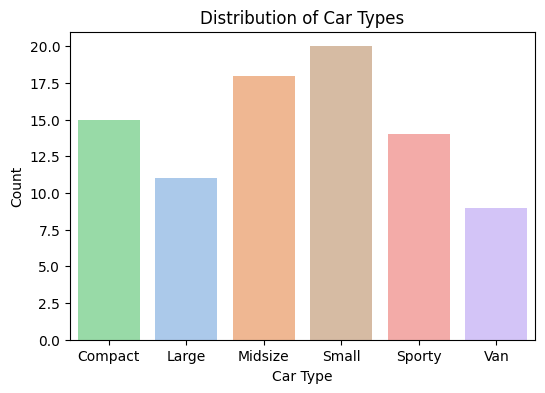

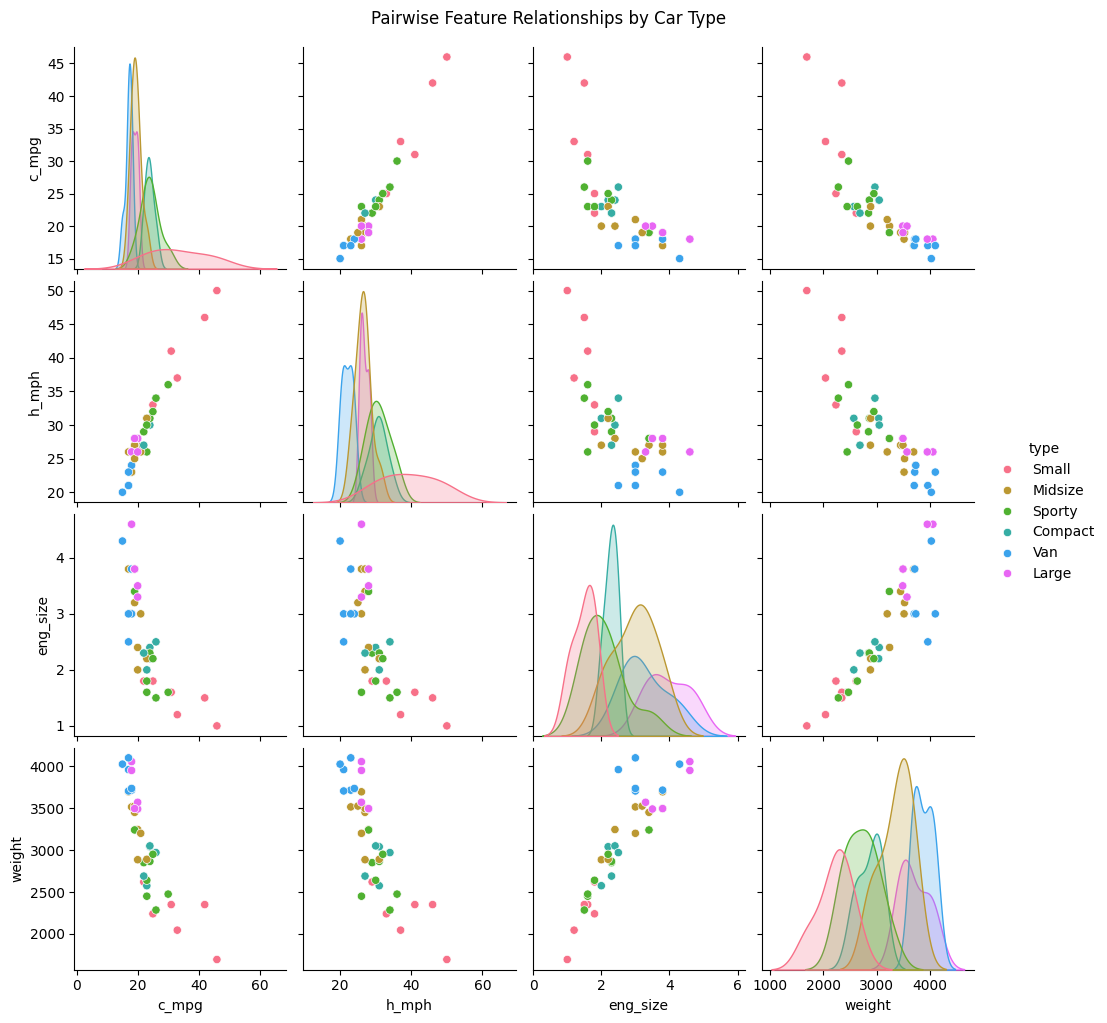

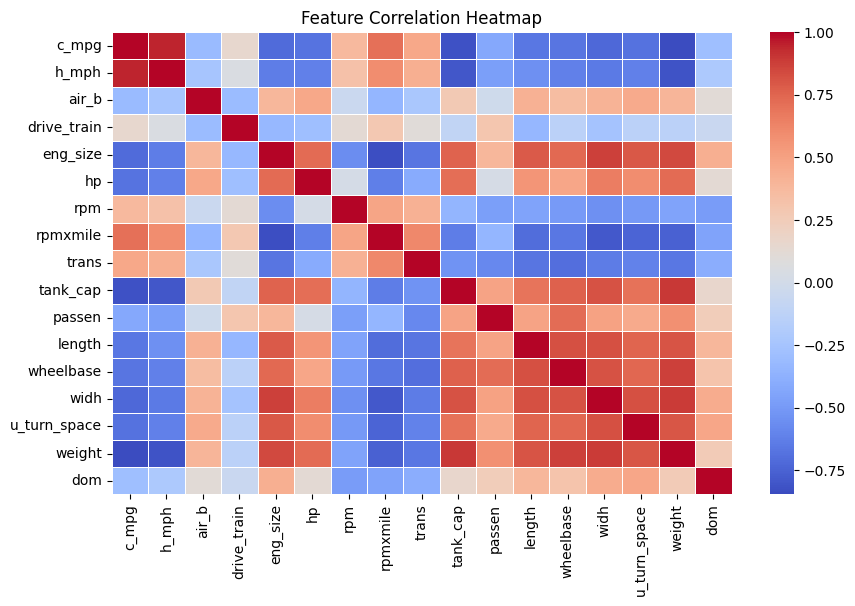

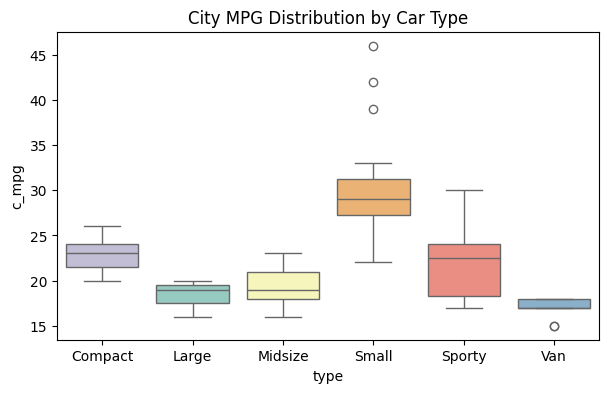

In [17]:
# Question 5
display(df_main.describe().T.head(10))

plt.figure(figsize=(6,4))
sns.countplot(data=df_main, x="type", hue="type", palette="pastel", 
              order=sorted(df_main["type"].unique()), legend=False)
plt.title("Distribution of Car Types")
plt.xlabel("Car Type")
plt.ylabel("Count")
plt.show()

sns.pairplot(df_main.sample(40, random_state=1),
             vars=["c_mpg", "h_mph", "eng_size", "weight"],
             hue="type", diag_kind="kde", palette="husl")
plt.suptitle("Pairwise Feature Relationships by Car Type", y=1.02)
plt.show()

plt.figure(figsize=(10,6))
corr = df_main.select_dtypes(include=[float, int]).corr()
sns.heatmap(corr, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

plt.figure(figsize=(7,4))
sns.boxplot(data=df_main, x="type", y="c_mpg", hue="type",
            palette="Set3", order=sorted(df_main["type"].unique()),
            legend=False)
plt.title("City MPG Distribution by Car Type")
plt.show()


In [18]:
# Question 6

X = df_main.drop(columns=["type"])
y = df_main["type"]

cat_cols = X.select_dtypes(include=["object"]).columns
num_cols = X.select_dtypes(exclude=["object"]).columns

encoder_kwargs = {}
if tuple(int(x) for x in sklearn.__version__.split(".")[:2]) >= (1, 2):
    encoder_kwargs["sparse_output"] = False
else:
    encoder_kwargs["sparse"] = False

preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore", **encoder_kwargs), cat_cols),
    ],
    sparse_threshold=0.0,
)

bayes_pipeline = Pipeline([
    ("preprocess", preprocessor),
    ("classifier", GaussianNB()),
])

bayes_pipeline.fit(X, y)

,steps,"[('preprocess', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.0
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [19]:
# Question 7
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = ["accuracy", "precision_macro", "recall_macro", "f1_macro"]

cv_results = cross_validate(
    bayes_pipeline,
    X, y,
    cv=kfold,
    scoring=scoring,
    return_train_score=False
)

cv_summary = pd.DataFrame(cv_results)
display(cv_summary)

for metric in scoring:
    mean_val = cv_summary[f"test_{metric}"].mean()
    std_val = cv_summary[f"test_{metric}"].std()
    print(f"{metric:>15}: {mean_val:.3f} ± {std_val:.3f}")

/home/saint-michael/school /data science/f25-ds-hw-JarvinChavez/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/saint-michael/school /data science/f25-ds-hw-JarvinChavez/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


,fit_time,score_time,test_accuracy,test_precision_macro,test_recall_macro,test_f1_macro
0,0.014308,0.024686,0.444444,0.402778,0.402778,0.395370
1,0.012615,0.022017,0.722222,0.780556,0.722222,0.736111
2,0.011444,0.022254,0.705882,0.819444,0.722222,0.747222
3,0.011044,0.022197,0.529412,0.555556,0.597222,0.531746
4,0.011499,0.022479,0.588235,0.595238,0.527778,0.493434


       accuracy: 0.598 ± 0.118
precision_macro: 0.631 ± 0.171
   recall_macro: 0.594 ± 0.136
       f1_macro: 0.581 ± 0.155


In [20]:
#  Question 8
pre = bayes_pipeline.named_steps["preprocess"]
clf = bayes_pipeline.named_steps["classifier"]

feature_names = pre.get_feature_names_out()

classes = clf.classes_
priors = pd.Series(clf.class_prior_, index=classes, name="class_prior")
display(priors)

theta_df = pd.DataFrame(clf.theta_, index=classes, columns=feature_names)
var_df   = pd.DataFrame(clf.var_,   index=classes, columns=feature_names)

num_mask = np.array([name.startswith("num__") for name in feature_names])
cat_mask = ~num_mask

num_features = feature_names[num_mask]
cat_features = feature_names[cat_mask]

global_mean = theta_df.mean(axis=0)
global_std  = theta_df.std(axis=0).replace(0, np.nan)

z_by_class = (theta_df.subtract(global_mean, axis=1)).divide(global_std, axis=1)

def top_indicators_for(cls, k=8):
    """Return the top |z| features for a class, with sign showing direction."""
    z = z_by_class.loc[cls].dropna()
    top = z.abs().sort_values(ascending=False).head(k).index
    out = pd.DataFrame({
        "z_from_global": z.loc[top],
        "class_mean": theta_df.loc[cls, top],
        "class_var": var_df.loc[cls, top]
    })
    return out

for cls in classes:
    display(top_indicators_for(cls, k=10))

Compact    0.172414
Large      0.126437
Midsize    0.206897
Small      0.229885
Sporty     0.160920
Van        0.103448
Name: class_prior, dtype: float64

,z_from_global,class_mean,class_var
cat__brand_Saab,2.041241,0.066667,0.062583
cat__lugg_cap_14,1.833089,0.733333,0.195916
cat__rear_seat_room_29.5,1.614582,0.133333,0.115916
cat__brand_Mercedes-Benz,1.458030,0.066667,0.062583
cat__brand_Volvo,1.458030,0.066667,0.062583
cat__n_cil_4,1.310951,1.000000,0.000360
cat__rear_seat_room_25,1.152432,0.133333,0.115916
cat__n_cil_6,-1.130965,0.000000,0.000360
cat__lugg_cap_13,1.122427,0.200000,0.160360
cat__brand_Toyota,-1.119315,0.000000,0.000360


,z_from_global,class_mean,class_var
cat__lugg_cap_21,2.041241,0.181818,0.149121
cat__rear_seat_room_36,2.041241,0.090909,0.083005
cat__lugg_cap_20,2.041241,0.090909,0.083005
cat__lugg_cap_22,2.041241,0.090909,0.083005
cat__lugg_cap_17,2.006654,0.272727,0.198707
cat__brand_Buick,1.944765,0.181818,0.149121
cat__n_cil_8,1.927998,0.363636,0.231765
num__dom,1.909231,1.000000,0.000360
cat__rear_seat_room_31.5,1.903217,0.181818,0.149121
cat__brand_Chrysler,1.903217,0.181818,0.149121


,z_from_global,class_mean,class_var
cat__brand_Lexus,2.041241,0.111111,0.099126
cat__brand_Infiniti,2.041241,0.055556,0.052829
cat__lugg_cap_19,2.041241,0.055556,0.052829
cat__rear_seat_room_29,2.041241,0.055556,0.052829
cat__lugg_cap_16,1.988936,0.222222,0.173200
cat__rear_seat_room_28.5,1.948213,0.222222,0.173200
cat__lugg_cap_15,1.630749,0.277778,0.200978
cat__rear_seat_room_31,1.473633,0.111111,0.099126
cat__brand_Mitsubishi,1.390030,0.055556,0.052829
cat__brand_Ford,-1.238407,0.055556,0.052829


,z_from_global,class_mean,class_var
cat__lugg_cap_10,2.041241,0.20,0.16036
cat__n_cil_3,2.041241,0.15,0.12786
cat__rear_seat_room_25.5,2.041241,0.05,0.04786
cat__brand_Saturn,2.041241,0.05,0.04786
cat__brand_Suzuki,2.041241,0.05,0.04786
cat__lugg_cap_12,1.952721,0.30,0.21036
cat__rear_seat_room_26.5,1.817861,0.25,0.18786
num__c_mpg,1.812207,30.10,36.09036
cat__rear_seat_room_26,1.726394,0.25,0.18786
cat__lugg_cap_11,1.725420,0.25,0.18786


,z_from_global,class_mean,class_var
cat__rear_seat_room_23,2.041241,0.142857,0.122809
cat__rear_seat_room_24.5,2.041241,0.142857,0.122809
cat__rear_seat_room_20,2.041241,0.071429,0.066687
cat__n_cil_?,2.041241,0.071429,0.066687
cat__lugg_cap_8,2.041241,0.142857,0.122809
cat__rear_seat_room_?,2.041241,0.142857,0.122809
cat__lugg_cap_6,2.041241,0.071429,0.066687
cat__rear_seat_room_19,2.041241,0.071429,0.066687
cat__brand_Plymouth,2.041241,0.071429,0.066687
cat__rear_seat_room_23.5,1.915186,0.142857,0.122809


,z_from_global,class_mean,class_var
cat__rear_seat_room_34,2.041241,0.111111,0.099126
cat__rear_seat_room_33.5,2.041241,0.111111,0.099126
cat__lugg_cap_?,2.020376,1.000000,0.000360
cat__brand_Pontiac,-1.810558,0.000000,0.000360
cat__n_cil_5,1.792843,0.111111,0.099126
num__drive_train,1.792369,1.555556,0.247274
num__passen,1.574412,7.111111,0.099126
cat__rear_seat_room_27,1.506134,0.111111,0.099126
cat__brand_Nissan,1.506134,0.111111,0.099126
cat__brand_Chevrolet,1.491085,0.222222,0.173200


<Figure size 800x600 with 0 Axes>

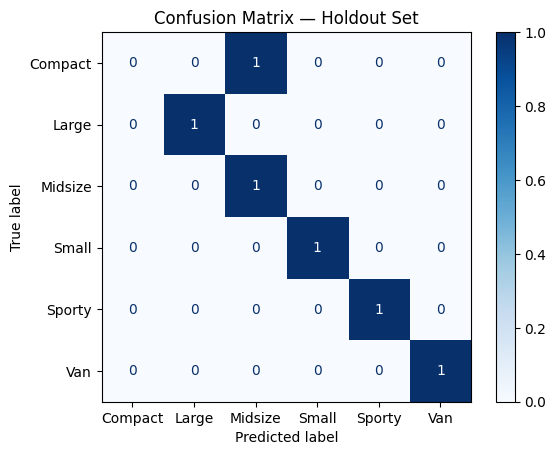

In [21]:
# Question 9
X_holdout = holdout_df.drop(columns=["type"])
y_holdout = holdout_df["type"]

y_pred = bayes_pipeline.predict(X_holdout)

cm = confusion_matrix(y_holdout, y_pred, labels=bayes_pipeline.named_steps["classifier"].classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=bayes_pipeline.named_steps["classifier"].classes_)

plt.figure(figsize=(8,6))
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix — Holdout Set")
plt.show()

In [22]:
# Question 10
y_true = y_holdout
y_pred = bayes_pipeline.predict(X_holdout)

acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, average="macro", zero_division=0)
rec = recall_score(y_true, y_pred, average="macro", zero_division=0)
f1 = f1_score(y_true, y_pred, average="macro", zero_division=0)

cm = confusion_matrix(y_true, y_pred, labels=bayes_pipeline.named_steps["classifier"].classes_)
classes = bayes_pipeline.named_steps["classifier"].classes_

specificity_list = []
for i, cls in enumerate(classes):
    tn = cm.sum() - (cm[i, :].sum() + cm[:, i].sum() - cm[i, i])
    fp = cm[:, i].sum() - cm[i, i]
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    specificity_list.append(specificity)

specificity_df = pd.DataFrame({
    "Class": classes,
    "Specificity": specificity_list
}).set_index("Class")

display(specificity_df)

,Specificity
Class,
Compact,1.0
Large,1.0
Midsize,0.8
Small,1.0
Sporty,1.0
Van,1.0
